# Excerise - Logistic Regression and Classification Measures
In this exercise you will explore how hard it is to find the best balance between TPR and FPR. 

Next, you will implement a logistic regression classifier using gradient decent.

We will then turn to applying multi-class classifiers over the well known MNIST digits database, and analyse the results using a confusion matrix.

## Balancing TPR and FPR and interpretability of a classifier results given inbalance between classes
After your yearly checkup, the doctor has bad news and good news. The bad news is that you tested positive for a serious disease, and that the test is 99% accurate (i.e. the probability of testing positive given that you have the disease is 0.99, as is the probability of testing negative given that you don’t have the disease). The good news is that this is a rare disease, striking only 1 in 10,000 people. 

1. What is the accuracy of always predicting a patient is healthy? Would that be a good strategy?

2. What are the TPR and FPR of the chosen classifier in this case? Giving that there is a tradeoff between the two --- is it a good point on the ROC curve?

3. Why is it good news that the disease is rare? What are the chances that you actually have the disease?

4. Taking into account the previous answers, would you say the designer of the classifier made a good choice in this case?



#### Answer 1

a) This method will predict correctly 9999/10000 so 99.99%
This method will be in incorrect 0.01% of the time

b) No, if we apply this method on a sample of not heathly people the test will predict incorrectly 100% of the time. It doesn't help at all. FDA won't be convinced by such method.


#### Answer 2

TPR: TP / (TP + FP) = 9999/(9999 + 1) = 99.99%


FPR: FP / (FP + TP) = 1 / (1 + 9999)  = 0.01%

Yes it's a very good point on the curse 
X (FPR) = 0.01
Y (TPR) = 99.99

#### Answer 3
a) As the disease is rare and the test is not especially accurate the probability to be heathly is still OK (better than it appears without the prior)

b) with test
0.99 * 0.0001 = 0.000099
so 0.0099%


with classifier (always predicting a patient is healthy)
0.9999 * 0.0001 = 0.00009999
so 0.009999%

#### Answer 4


Well, the test doesn't seem accurate so if we check only the number it seems useless

## Implementing Logistic Regression Model
Recall the loss function of the binary (Univariate) Logistic Regression model

$$ J(\beta)=-\frac{1}{m}\sum_{i=1}^{m}\left(y^{(i)}\log(h_\beta(x^{(i)}))+(1-y^{(i)})\log(1-h_\beta(x^{(i)}))\right) $$

and the gradient decent update rule is given by

$$ \beta_j^t := \beta_j^{t-1}-\mu\frac{\partial}{\partial \beta_j}J(\beta)
$$

1. Write the explicit (and rather simple) update rule for a gradient decent solver of the Logistic Regression model.
2. Implement a LogisticRegression class with `fit`, `predict`, and `score` functions, and the constructor of the class should have the following parameters (feel free to add methods and parameters as you see fit):
  * `method`: either `GD` or `SGD`, indiacting whether to use a regular gradient decent, or an [iterative stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Iterative_method) respectively.
  * `learning_rate`: the learning rate to be used
  * `num_iterations`: number of iterations for the gradient decent algorithms (**note** that for stochastic gradient decent, each iteration is interpreted in that aspect as an epoch of going over all the samples, as it is computationaly similar to a single iteration of regular gradient decent)
  * `track_loss`: a boolean stating if to track the loss of the model for each iteration during training; if `True` the model will have a `loss` vector with the loss that was claculated for each of the iterations.
3. Use the provided code to load the Iris dataset as a toy example, on which we will compare the results of the two logistic regression solvers. Run both solvers (GD and SGD) for 1000 iterations, using a learning rate of 0.1, and compare the learning curve by plotting the loss during training. Describe the results, and plot the decision boundary for each of the models. What would you see if you plot the loss after each parameters update (for each sample in every epoch)?
 
 
For simplicity, do not use regularization, and we will not try to find the best learning rate --- however, you are more than welcome to play with those on your own.


#### Answer 1
answer here

#### Answer 2

In [10]:
# code here
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')

In [11]:
class myLogisticRegression():
        
    def __init__(self, learn_rate=0.1, num_iterations=1000, track_loss=False, method='gd', prob=0.5):
        self._lr = learn_rate
        self._nb_iter = num_iterations
        self._track_loss = track_loss
        self._method = method
        self._prob = prob
        self._scaler = StandardScaler()

    def predict_prob(self, x):
        X = self._adjustX(x)
        ret = self._sigmoid(X @ self._W)
        return ret 
    
    def predict(self, X):
        ret = self.predict_prob(X)
        return np.array([1 if x > self._prob else 0 for x in ret]) #to check: remove loop
    
    def score(self, x, y, to_adjust=True):
        if to_adjust is True:
            X = self._adjustX(x)
        else:
            X = x
        y_hat = self._sigmoid(X @ self._W)
        n = x.shape[0]
        lost = -(1/n)*(y.T @ np.log(y_hat) + (1 - y).T @ np.log(1 - y_hat))
        return lost
    
    def get_score_list(self):
       # print("get_score_list:{}".format(self._track_loss_list))
        return self._track_loss_list
  
    def fit(self, x, y):
        X = self._adjustX(x)
        if self._track_loss is True:
            self._track_loss_list = []
        method = self._method
        if method.lower() == 'gd':
            self._fit_gd(X, y) 
        if method.lower() == 'sgd':
            self._fit_sgd(X, y)
            
    def _fit_gd(self, X, y):
        print("gd")
        n, p = X.shape
        self._W = np.random.rand(p)       
        for i in range(self._nb_iter):
            y_hat = self._sigmoid(X @ self._W)
            self._W -= 2 * self._lr / n * (X.T @(y_hat - y))
            if self._track_loss == True:
                score = -(1/n)*(y.T @ np.log(y_hat) + (1 - y).T @ np.log(1 - y_hat))
                self._track_loss_list.append(score)
                
# https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/
# In a “purist” implementation of SGD, your mini-batch size would be set to 1    
    def _fit_sgd(self, X, y):
        print("sgd")
        n, p = X.shape
        self._W = np.random.rand(p)    
        loop_size = n // 4
#         print(loop_size)
        for i in range(self._nb_iter):
            for i in range(loop_size):
                
                non_used, X_test, non_used, y_test = train_test_split(X, y, test_size=1/20)
#                 print(X_test.shape)
#                 print(self._W.shape)
                y_hat = self._sigmoid(X_test @ self._W)
                self._W -= 2 * self._lr / n * (X_test.T @(y_hat - y_test))
                
#                 implementation for batch of size: 1
#                 index = np.random.randint(0, n)
#                 xi = X[index, :].reshape(1, p)
#                 yi = y[index]
#                 y_hat = self._sigmoid(xi @ self._W)
#                 self._W -= 2 * self._lr / n * (xi.T @(y_hat - yi))

            if self._track_loss == True:
                score = self.score(X, y, False)
                self._track_loss_list.append(score)
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _adjustX(self, x):
        self._scaler.fit(x)
        X = self._scaler.transform(x)
        return np.c_[np.ones(x.shape[0]), X]


#### Answer 3

Below is the code for loading the iris dataset and plotting the data with the models decision boundary.

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1


In [13]:
# simplefilter(action="default" ,category=DeprecationWarning)
# simplefilter(action="default" ,category="ConvergenceWarning")
# simplefilter(action="default" ,category="*")

In [14]:
def plot_samples(X, y, gd_model=None, sgd_model=None):
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')

    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    if gd_model is not None:
        probs = gd_model.predict_prob(grid).reshape(xx1.shape)
        plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black'); #, label='GD'
    if sgd_model is not None:
        probs = sgd_model.predict_prob(grid).reshape(xx1.shape)
        plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='green'); #, label='SGD'
    plt.legend()
    plt.show()
#plt.axhline(.5, color='black')

gd
sgd


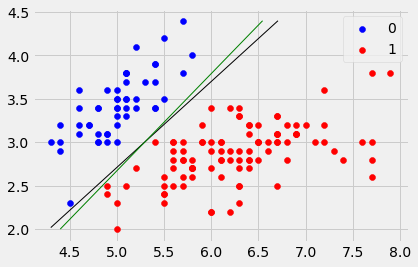

In [15]:
score_list_gd = []
lr = myLogisticRegression(num_iterations=1000, track_loss=True, method='gd')
lr.fit(X, y)
y_hat_gd_p = lr.predict_prob(X)
y_hat_gd = lr.predict(X)
score_list_gd = lr.get_score_list()
score_list_sgd = []
lrSgr = myLogisticRegression(num_iterations=1000, track_loss=True, method='sgd')
lrSgr.fit(X, y)
y_hat_sgd = lrSgr.predict(X)
y_hat_sgd_p = lrSgr.predict_prob(X)
score_list_sgd = lrSgr.get_score_list()

plot_samples(X, y, gd_model=lr, sgd_model=lrSgr)

In [9]:


# ind1, = np.where(X[:,0] < 4.6) 
ind1, = np.where(np.logical_and(X[:,0] < 4.6,X[:,1] < 2.5 )) 
print(ind1)
# ind2, = np.where(X[:,1] < 2.5)
# np.intersect1d(ind1, ind2)
print(X[41])
X_weird = X[41]
print("y_true:{},y_hat_gd:{}, y_hat_sgd:{}".format(y[41],y_hat_gd[41], y_hat_sgd[41]))
print("y_true:{},y_hat_gd:{}, y_hat_sgd:{}".format(y[41],y_hat_gd_p[41], y_hat_sgd_p[41]))

[41]
[4.5 2.3]
y_true:0,y_hat_gd:1, y_hat_sgd:1
y_true:0,y_hat_gd:0.6124097035698883, y_hat_sgd:0.5002248136091242


## Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Multivariate Logistic Regression (a discriminative model). 

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```mnist = sklearn.datasets.fetch_mldata('MNIST original')```

to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.


In [9]:
# your code
from sklearn import datasets
from sklearn.datasets import fetch_mldata
from sklearn.datasets import load_digits
# from warnings import simplefilter

# simplefilter(action="ignore" ,category=DeprecationWarning)


# mnist = fetch_mldata('MNIST original', data_home="/tmp/")

mnist = datasets.fetch_openml('mnist_784')

In [10]:
X, y = mnist.data, mnist.target

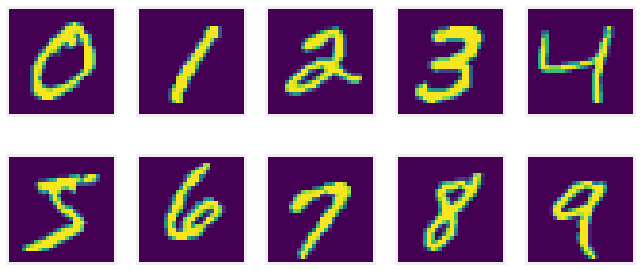

In [11]:
digits, indices = np.unique(y, return_index=True)

fig = plt.figure(figsize=(10,5))

for i, indice in enumerate(indices):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(mnist.data[indice].reshape(28, 28))
    

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)


### Multivariate Logistic Regression
We will now apply the Multivariate Logistic Regression model discriminative model for this problem. We will use a prepared implementation of the model, so you won't need to implement it.

In this part we will keep the pixel values in grayscale, and assume the probability of each image being classified as one of the 10 digit classes, matches some multivariate logistic function.

#### Question 1
Run a Multivariate Logitic Regression classifier on the training data and apply predictions on the test data. Use the [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation, and set the `solver` to be `'lbfgs'`, and  `multi_class` to `'multinomial'` (leave all other parameters in their default value).

1. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

2. Show some test images which were missclassified (classified incorrectly). Choose one such sample, and output the probability estimates for all classes (use the `predict_proba` function). Describe the results.

Note that here we cannot "generate" examples from the model.

#### Answer 1
Put you answer here...

In [13]:
# as we eave all other parameters in their default value I remove the ConvergenceWarning
# from warnings import simplefilter

# simplefilter(action="default", category="ConvergenceWarning")
simplefilter(action="default", category="*")

# don't work

NameError: name 'simplefilter' is not defined

In [14]:
# code goes here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
cm = confusion_matrix(y_test, y_hat)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [15]:
print(cm)
sum_trace = np.trace(cm)
ratio = sum_trace / y_hat.shape[0]
print("There is {} images which were misclassiged on total of {}.".format(y_hat.shape[0] - sum_trace, y_hat.shape[0]))
print("There is {}% of correct result.".format(ratio * 100))

[[ 980    0    7    3    2    8    7    3    7    4]
 [   0 1110    9    5    0    3    0    1   19    2]
 [   4    6  884   24    7    5   15   10   16    4]
 [   2    6   31  945    2   32    3   10   16    9]
 [   1    5    7    2  895    1   11    7    7   31]
 [  15    3    6   32    7  726   14    5   33   10]
 [  11    1    6    0    6   15  918    2    5    2]
 [   2    2   11    8    7    1    1  997    2   34]
 [   8   15   14   19    5   32   11    1  875    9]
 [   4    6    2   15   19    3    0   27    7  878]]
There is 792 images which were misclassiged on total of 10000.
There is 92.08% of correct result.


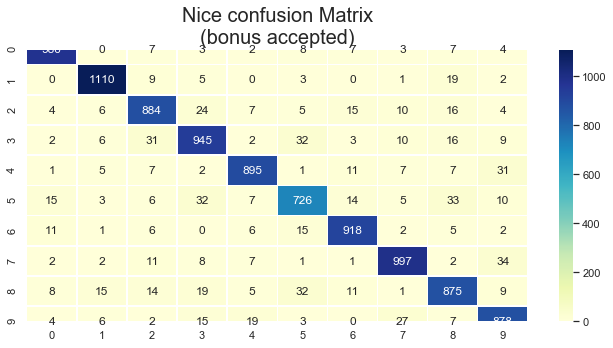

In [16]:
import seaborn as sns; sns.set()

plt.figure(figsize = (10,5))
ax = sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
a= ax.set_title("Nice confusion Matrix\n(bonus accepted)",fontsize=20)

# the top/botton truncated is a known issue: https://github.com/mwaskom/seaborn/issues/1773

This is a vector of indices containing all the errors:792
Here are the first 10 errors


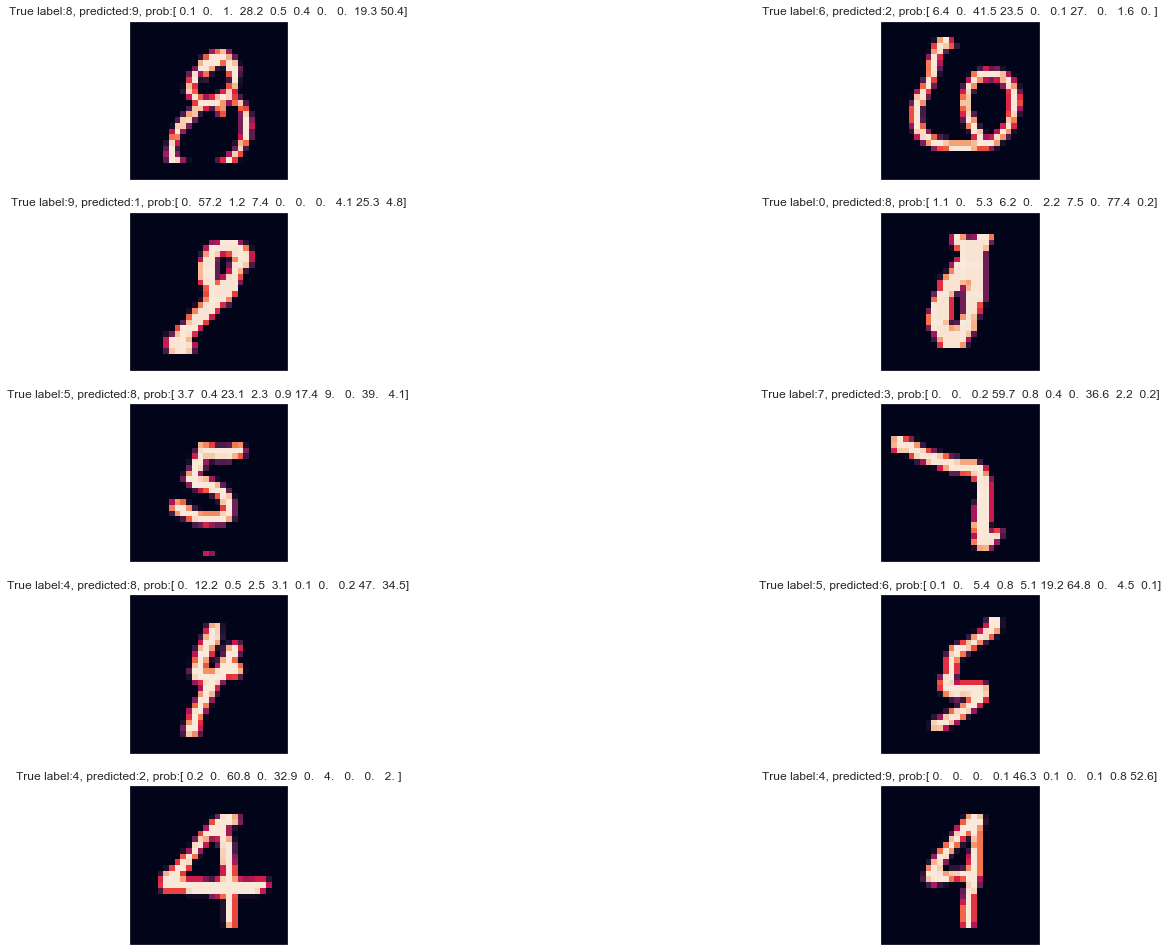

In [17]:
view = [(i) for i, (y1, y2) in enumerate(zip(y_test, y_hat)) if y1 != y2 ] 
prob = lr.predict_proba(X_test)
print("This is a vector of indices containing all the errors:{}".format(len(view)))
print("Here are the first 10 errors".format(len(view)))
fig = plt.figure(figsize=(22,17))
for i in range(10):
    ax = fig.add_subplot(5, 2, i + 1, xticks=[], yticks=[])
    ax.set_title("True label:{}, predicted:{}, prob:{}".format(y_test[view[i]], y_hat[view[i]], np.round(prob[view[i]]*100,1)))
    ax.imshow(X_test[view[i]].reshape(28, 28))
#     print("predicted:{}".format(y2[i]))
# try to print the incorrect prediction

#### Question 2
Comparing two methods for solving multiclass classification problems: one-vs-rest (OvR), and multinomial.

1. Discuss the results, and explain the plots in [Plot multinomial and One-vs-Rest Logistic Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html).

2. Create another Logistic Regression classifier, setting now `multi_class` to `'ovr'` (instead of `multinomial`). Leave all other parameters the same. Compare the accuracy of this model with the previous one model. 




#### Answer 2
Put you answer here...

In [0]:
# code goes here

In [18]:
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
cm = confusion_matrix(y_test, y_hat)
print(cm)
sum_trace = np.trace(cm)
ratio = sum_trace / y_hat.shape[0]
print("There is {} images which were misclassiged on total of {}.".format(y_hat.shape[0] - sum_trace, y_hat.shape[0]))
print("There is {}% of correct result.".format(ratio * 100))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/li

[[ 989    0    4    1    0    7    8    1   10    1]
 [   0 1108    9    3    0    4    3    1   19    2]
 [   7    8  873   17   10    4   15   10   27    4]
 [   3    5   36  937    3   24    3   11   19   15]
 [   1    4    8    1  895    0   10    4    9   35]
 [  10    6    7   31    6  719   24    3   33   12]
 [  12    1    8    1    2   18  918    0    5    1]
 [   3    3    9    3   15    1    0  990    5   36]
 [  10   16   14   22    4   39   10    1  862   11]
 [   9    5    2   14   36    4    0   32   10  849]]
There is 860 images which were misclassiged on total of 10000.
There is 91.4% of correct result.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


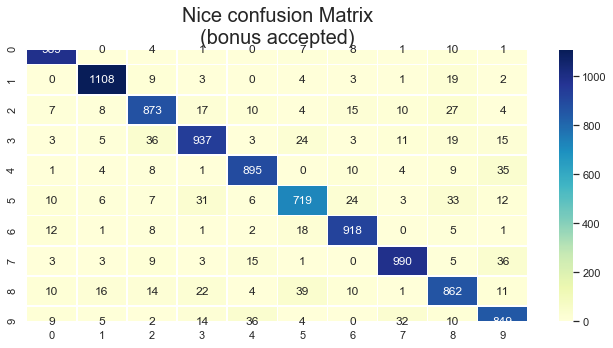

In [19]:
plt.figure(figsize = (10,5))
ax = sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
a= ax.set_title("Nice confusion Matrix\n(bonus accepted)",fontsize=20)